# Testing basic field operators in package `Whirl`

In [1]:
include(joinpath(Pkg.dir("Whirl"), "src/Whirl.jl"))
using Whirl

In [2]:
using Plots
pyplot()
clibrary(:colorbrewer)
default(grid = false)

### Testing new field types and operators

In [3]:
i = 5; j = 5;

In [4]:
nx = 12; ny = 12;

In [5]:
w = Nodes(Dual,(5,4))
w .= reshape(1:20,5,4)
w∘w
C = Curl()
D = Divergence()
D*(C*w)

Whirl.Fields.Nodes{Whirl.Fields.Primal,5,4} data
Printing in grid orientation (lower left is (1,1)):
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0

In [6]:
w

Whirl.Fields.Nodes{Whirl.Fields.Dual,5,4} data
Printing in grid orientation (lower left is (1,1)):
 16.0  17.0  18.0  19.0  20.0
 11.0  12.0  13.0  14.0  15.0
  6.0   7.0   8.0   9.0  10.0
  1.0   2.0   3.0   4.0   5.0

In [7]:
w = Nodes(Dual,(12,12));
w[4,4] = 1.0;
q = Edges(Primal,w)
curl!(q,w)

Whirl.Fields.Edges{Whirl.Fields.Primal,12,12} data
u (in grid orientation):
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  -1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
v (in grid orientation):
 0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0

In [8]:
typeof((Nodes(Primal,(8,6)),Nodes(Primal,(8,6))))

Tuple{Whirl.Fields.Nodes{Whirl.Fields.Primal,8,6},Whirl.Fields.Nodes{Whirl.Fields.Primal,8,6}}

In [9]:
q = Edges(Dual,(8,6));
p = deepcopy(q);
q.u[3,2] = 0.3;
p.u[3,2] = 0.2;
p∘q

Whirl.Fields.Edges{Whirl.Fields.Dual,8,6} data
u (in grid orientation):
 0.0  0.0  0.0   0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0
 0.0  0.0  0.06  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0
v (in grid orientation):
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [10]:
q = Edges{Dual, 5, 4}()
q.u .= reshape(1:16, 4, 4)
q.v .= reshape(1:15, 5, 3)
v = Edges{Primal, 5, 4}()
Fields.shift!(v,q)
v.v

4×4 Array{Float64,2}:
 0.0  4.0   9.0  0.0
 0.0  5.0  10.0  0.0
 0.0  6.0  11.0  0.0
 0.0  7.0  12.0  0.0

In [12]:
nx = 100; ny = 100;
i = 40; j = 50;
w = Nodes(Dual,(nx,ny))
w[i,j] = 1.0
E = plan_intfact(5,w)
E25 = plan_intfact(2.5,w)

Integrating factor with parameter 2.5 on a (nx = 100, ny = 100) grid

In [13]:
E25*(E25*w)≈E*w

true

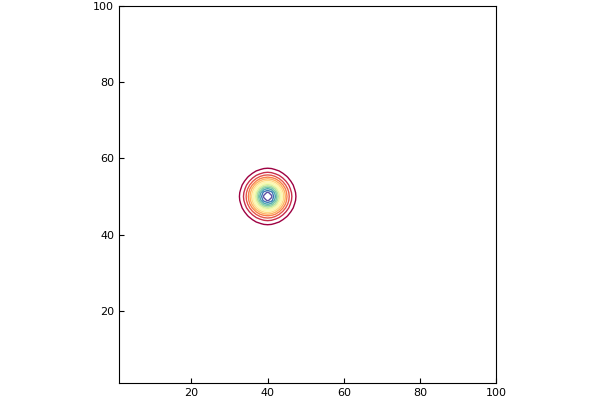

/Users/jeff/.julia/v0.6/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label'
  s)


In [14]:
plot(E*w)

In [15]:
cellzero = Nodes(Dual,(nx,ny))
nodezero = Nodes(Primal,cellzero)
facezero = Edges(Primal,cellzero)
dualfacezero = Edges(Dual,cellzero)

cellunit = deepcopy(cellzero)
cellunit[i,j] = 1.0

1.0

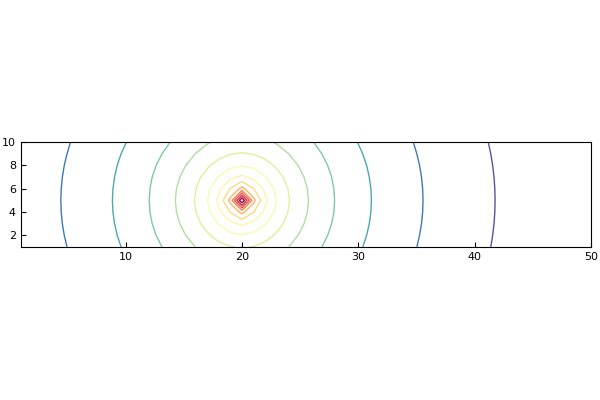

In [16]:
w = Nodes(Dual,(50,10));
w[20,5] = 1.0
L = plan_laplacian(w,with_inverse=true)
plot(L\w)

In [17]:
E = plan_intfact(1.0,(nx,ny))

Integrating factor with parameter 1.0 on a (nx = 100, ny = 100) grid

In [18]:
E! = plan_intfact!(1.0,(nx,ny))

In-place integrating factor with parameter 1.0 on a (nx = 100, ny = 100) grid

In [19]:
w = deepcopy(cellunit)

Whirl.Fields.Nodes{Whirl.Fields.Dual,100,100} data
Printing in grid orientation (lower left is (1,1)):
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

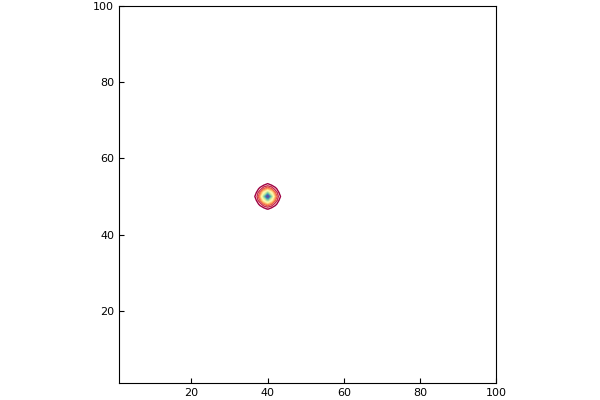

In [20]:
plot(E!*w)

In [21]:
C = Curl()
C*w

Whirl.Fields.Edges{Whirl.Fields.Primal,100,100} data
u (in grid orientation):
  1.66125e-19  -3.25268e-19  -1.16711e-18  …  -3.62022e-19  -3.07468e-19
  3.12131e-19   5.50006e-19   8.39821e-19      1.06311e-20  -4.83074e-19
  4.83699e-19   7.61666e-19   7.3879e-19       2.93144e-19   4.22365e-19
 -7.11088e-19  -7.70807e-19  -5.10211e-19     -3.58178e-20   2.30061e-19
  3.10273e-19   3.20898e-19   2.2013e-19      -5.83955e-19  -4.83641e-19
  7.84332e-19   7.51139e-19   7.49493e-19  …   2.67225e-19   2.03984e-19
 -1.50942e-19  -1.75365e-19   6.0493e-20       3.8595e-19    3.56518e-19
 -2.13145e-19   6.15254e-20   4.90927e-20     -2.85392e-19  -9.33311e-20
 -1.11128e-18  -5.83932e-19  -8.00612e-20      3.40378e-22  -7.36388e-19
  8.13849e-19   6.65247e-19   1.4399e-19      -6.76873e-19  -1.8771e-19 
 -4.8202e-19   -1.15264e-18  -1.16049e-18  …   1.59665e-18   1.38293e-18
  6.42711e-19   7.95433e-19   8.07365e-19     -1.12314e-18  -8.09886e-19
  4.28253e-19   1.64393e-19  -2.35963e-19     

In [22]:
Nodes(Primal,cellunit)

Whirl.Fields.Nodes{Whirl.Fields.Primal,100,100} data
Printing in grid orientation (lower left is (1,1)):
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0

In [24]:
w = Fields.Nodes{Fields.Dual, 5, 4}()
w .= reshape(1:20, 5, 4)
Ww = Fields.shift(w)

Whirl.Fields.Edges{Whirl.Fields.Dual,5,4} data
u (in grid orientation):
  0.0   0.0   0.0   0.0
 11.5  12.5  13.5  14.5
  6.5   7.5   8.5   9.5
  0.0   0.0   0.0   0.0
v (in grid orientation):
 0.0  14.5  15.5  16.5  0.0
 0.0   9.5  10.5  11.5  0.0
 0.0   4.5   5.5   6.5  0.0

In [25]:
s = Fields.Nodes{Fields.Dual, 5, 4}()
s .= rand(5, 4)
Fields.divergence(Fields.curl(s))

Whirl.Fields.Nodes{Whirl.Fields.Primal,5,4} data
Printing in grid orientation (lower left is (1,1)):
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0

In [27]:
v = Fields.Nodes(Fields.Dual,(12,12))
v[4,5] = 1.0
v

Whirl.Fields.Nodes{Whirl.Fields.Dual,12,12} data
Printing in grid orientation (lower left is (1,1)):
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [28]:
L = plan_laplacian(nx,ny;with_inverse=true)

Discrete Laplacian (and inverse) on a (nx = 100, ny = 100) grid with spacing 1.0

In [30]:
faceones = deepcopy(facezero)
fill!(faceones,1.0)

Whirl.Fields.Edges{Whirl.Fields.Primal,100,100} data
u (in grid orientation):
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  

In [31]:
L*(L\cellunit)

Whirl.Fields.Nodes{Whirl.Fields.Dual,100,100} data
Printing in grid orientation (lower left is (1,1)):
 0.0   0.0           0.0          …   0.0           0.0          0.0
 0.0   1.11022e-16   3.33067e-16      2.22045e-16   1.9984e-15   0.0
 0.0  -9.99201e-16  -7.77156e-16     -9.99201e-16  -1.77636e-15  0.0
 0.0   1.11022e-15   1.22125e-15      1.88738e-15   1.9984e-15   0.0
 0.0  -2.10942e-15  -1.44329e-15     -1.55431e-15  -1.33227e-15  0.0
 0.0   1.88738e-15   6.66134e-16  …  -5.55112e-16   5.55112e-16  0.0
 0.0   4.44089e-16  -2.22045e-16      1.55431e-15   1.11022e-16  0.0
 0.0  -5.55112e-16   4.44089e-16     -7.77156e-16   1.11022e-15  0.0
 0.0   1.33227e-15   3.33067e-16      6.66134e-16  -9.99201e-16  0.0
 0.0  -3.33067e-16   5.55112e-16     -5.55112e-16   0.0          0.0
 0.0  -1.11022e-16  -2.22045e-16  …   2.22045e-16  -1.44329e-15  0.0
 0.0  -1.11022e-16   3.33067e-16     -1.11022e-16   1.9984e-15   0.0
 0.0   1.44329e-15   6.66134e-16      2.22045e-16  -3.33067e-16  0.0


In [34]:
w = Fields.Nodes(Fields.Primal,v)
w[4,5] = 1.0
Fields.grad(w)

Whirl.Fields.Edges{Whirl.Fields.Primal,12,12} data
u (in grid orientation):
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  -1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
v (in grid orientation):
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0

In [36]:
q = Fields.Edges(Fields.Dual,v)
q.u[4,5] = 1.0
dq = Fields.grad(q)
dq.dudy

Whirl.Fields.Nodes{Whirl.Fields.Primal,12,12} data
Printing in grid orientation (lower left is (1,1)):
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  -1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0